In [1]:
import sys
sys.path = ['', '/Users/amy/Repositories/amy/amy/pyQuil_workshop/pyQuil_workshop_notebooks', '/Users/amy/Repositories/amy', '/Users/amy/miniconda3/envs/grove-pyQuil2.0/lib/python36.zip', '/Users/amy/miniconda3/envs/grove-pyQuil2.0/lib/python3.6', '/Users/amy/miniconda3/envs/grove-pyQuil2.0/lib/python3.6/lib-dynload', '/Users/amy/.local/lib/python3.6/site-packages', '/Users/amy/miniconda3/envs/grove-pyQuil2.0/lib/python3.6/site-packages']

Everything in this notebook is taken from the [Introduction to Quantum Computing](https://pyquil.readthedocs.io/en/stable/intro.html#some-code) section of the pyQuil documentation. Refer there if you need help getting through these exercises. 

In [2]:
# Imports for pyQuil
import numpy as np
from pyquil import Program, get_qc
from pyquil.api import WavefunctionSimulator
from pyquil.gates import H, I, X, Y, Z, CNOT, MEASURE

# Single Qubit Operations

Let's try applying an identity gate, which we know should do nothing. 

In [3]:
# create a WavefunctionSimulator object and a generic QuantumComputer object
wavefunction_simulator = WavefunctionSimulator()
qc = get_qc('9q-generic-qvm')

# pyQuil is based around operations (or gates) so we will start with the most
# basic one: the identity operation, called I. I takes one argument, the index
# of the qubit that it should be applied to.
# Make a quantum program that allocates one qubit (qubit #0) and does nothing to it
p = Program(I(0))

# Quantum states are called wavefunctions for historical reasons.
# We can run this basic program on our connection to the simulator.
# This call will return the state of our qubits after we run program p.
# This api call returns a tuple, but we'll ignore the second value for now.
wavefunction = wavefunction_simulator.wavefunction(p)

# wavefunction is a Wavefunction object that stores a quantum state as a list of amplitudes
alpha, beta = wavefunction

print("Our qubit is in the state alpha={} and beta={}".format(alpha, beta))
print("The probability of measuring the qubit in outcome 0 is {}".format(abs(alpha)**2))
print("The probability of measuring the qubit in outcome 1 is {}".format(abs(beta)**2))

Our qubit is in the state alpha=(1+0j) and beta=0j
The probability of measuring the qubit in outcome 0 is 1.0
The probability of measuring the qubit in outcome 1 is 0.0


With `run_and_measure`, we can supply a program and a number of trials, and we get back a dictionary of results across all qubits in the `QuantumComputer` object `qc`. 

In [4]:
p = Program(I(0))
results = qc.run_and_measure(p, trials=10)[0]

print(results)

[0 0 0 0 0 0 0 0 0 0]


The identity gate reads out uniformly in the ground state, as we expected. Now compare the action of the identity gate to the bit-flip or NOT gate, `X`. 

In [5]:
# TODO: replace this program with one that enacts an X gate
p = Program(X(0))

wavefunc = wavefunction_simulator.wavefunction(p)
alpha, beta = wavefunc

print("Our qubit is in the state alpha={} and beta={}".format(alpha, beta))
print("The probability of measuring the qubit in outcome 0 is {}".format(abs(alpha)**2))
print("The probability of measuring the qubit in outcome 1 is {}".format(abs(beta)**2))

Our qubit is in the state alpha=0j and beta=(1+0j)
The probability of measuring the qubit in outcome 0 is 0.0
The probability of measuring the qubit in outcome 1 is 1.0


In [6]:
p = Program(X(0))
results = qc.run_and_measure(p, trials=10)[0]

print(results)

[1 1 1 1 1 1 1 1 1 1]


We can see that applying the X gate brings the qubit to the excited state, and so we repeatedly read out `1`s. We can apply it again to make sure that the `X` gate acting on the excited state brings us back to the ground state. 

In [7]:
p = Program(X(0), X(0))
results = qc.run_and_measure(p, trials=10)[0]

print(results)

[0 0 0 0 0 0 0 0 0 0]


The wavefunction outcome probabilities are stored in a dictionary

In [8]:
# wavefunction(Program) returns a coefficient array that corresponds to outcomes in the following order
wavefunction = wavefunction_simulator.wavefunction(Program(I(0), I(1)))
print(wavefunction.get_outcome_probs())

{'00': 1.0, '01': 0.0, '10': 0.0, '11': 0.0}


Now we can look at the action of all the Pauli operators.

In [9]:
from pyquil.gates import X, Y, Z

p = Program(X(0))
wavefunction = wavefunction_simulator.wavefunction(p)
print("X|0> = ", wavefunction)
print("The outcome probabilities are", wavefunction.get_outcome_probs())
print("This looks like a bit flip.\n")

# TODO: replace this program with one that enacts a Y gate
p = Program()
wavefunction = wavefunction_simulator.wavefunction(p)
print("Y|0> = ", wavefunction)
print("The outcome probabilities are", wavefunction.get_outcome_probs())
print("This also looks like a bit flip.\n")

# TODO: replace this program with one that enacts a Z gate
p = Program()
wavefunction = wavefunction_simulator.wavefunction(p)
print("Z|0> = ", wavefunction)
print("The outcome probabilities are", wavefunction.get_outcome_probs())
print("This state looks unchanged.")

X|0> =  (1+0j)|1>
The outcome probabilities are {'0': 0.0, '1': 1.0}
This looks like a bit flip.

Y|0> =  (1+0j)|0>
The outcome probabilities are {'0': 1.0}
This also looks like a bit flip.

Z|0> =  (1+0j)|0>
The outcome probabilities are {'0': 1.0}
This state looks unchanged.


What happened with the `Z` gate? To elucidate the action let's try performing a `Z` gate on a qubit in the excited state rather than the ground state, which we just tried. 

In [10]:
# TODO: replace this program with one that prepares the excited state and then enacts a Z gate
p = Program()
wavefunction = wavefunction_simulator.wavefunction(p)
print("Z|0> = ", wavefunction)
print("The outcome probabilities are", wavefunction.get_outcome_probs())

Z|0> =  (1+0j)|0>
The outcome probabilities are {'0': 1.0}


Now, we can see that `Z` maps the excited state to itself with an additional $\pi$ phase. Let's try to compose some gate operations on the same qubit. 

In [11]:
# Composing qubit operations is the same as multiplying matrices sequentially
p = Program(X(0), Y(0), Z(0))
wavefunction = wavefunction_simulator.wavefunction(p)

print("ZYX|0> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs())

ZYX|0> =  -1j|0>
With outcome probabilities
 {'0': 1.0, '1': 0.0}


The Hadamard gate isn't a Pauli gate, although it is composed of two of them, i.e.

In [12]:
from pyquil.gates import H

had_program = Program(H(0))
wavefunction = wavefunction_simulator.wavefunction(had_program)

print("H|0> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs())

H|0> =  (0.7071067812+0j)|0> + (0.7071067812+0j)|1>
With outcome probabilities
 {'0': 0.4999999999999999, '1': 0.4999999999999999}


Notice that the Hadamard maps $\left|0\right>$ to $\left|+\right>=\frac{\left|0\right>+\left|1\right>}{2}$ and $\left|+\right>$ back to $\left|0\right>$, so it undoes itself if applied twice. In fact, the Hadamard operator does this regardless of the starting state, so we say $\hat{H}^2=\hat{I}$, and we call such an operator that undoes itself if applied twice _idempotent_. 

In [13]:
from pyquil.gates import H

# TODO: replace this program with one that enacts the Hadamard gate twice
had_program = Program()
wavefunction = wavefunction_simulator.wavefunction(had_program)

print("HH|0> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs())

HH|0> =  (1+0j)|0>
With outcome probabilities
 {'0': 1.0}


In [14]:
p = Program(H(0))
results = qc.run_and_measure(p, trials=10)[0]

print(results)

[1 1 1 1 0 0 0 0 1 0]


In [15]:
p = Program(X(0), H(0))
results = qc.run_and_measure(p, trials=10)[0]

print(results)

[0 0 0 0 1 0 0 1 1 0]


# Multi-Qubit Operations

We can just as easily work with more than one qubit

In [16]:
# Multiple qubits also produce the expected scaling of the state.
p = Program(I(0), I(1))
wavefunction = wavefunction_simulator.wavefunction(p)
print("The quantum state is of dimension:", len(wavefunction.amplitudes))

p = Program(I(0), I(1), I(2), I(3))
wavefunction = wavefunction_simulator.wavefunction(p)
print("The quantum state is of dimension:", len(wavefunction.amplitudes))

p = Program()
for x in range(10):
    p += I(x)
wavefunction = wavefunction_simulator.wavefunction(p)
print("The quantum state is of dimension:", len(wavefunction.amplitudes))

The quantum state is of dimension: 4
The quantum state is of dimension: 16
The quantum state is of dimension: 1024


In [17]:
p = Program(I(0), I(1))
results = qc.run_and_measure(p, trials=10)

print(results)

{0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 3: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 4: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 5: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 8: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}


Here for the first time we use `run` on a compiled executable rather than `run_and_measure`. We've also declared explicit classical memory regions so that we only read out on the qubits we're interested in. 

In [18]:
p = Program()
# Declare two bits of classical memory
classical_memory = p.declare('ro', 'BIT', 2)

p.inst(H(0))
p.inst(X(1))

# Measure out on qubit 0 and record the results in the 0th index of classical_memory
p.inst(MEASURE(0, classical_memory[0]))
# Measure out on qubit 1 and record the results in the 1st index of classical_memory
p.inst(MEASURE(1, classical_memory[1]))

# Print out the Quil code for this Program
print(p)

# Measure the qubits specified by classical_register (qubits 0 and 1) a number of times
p.wrap_in_numshots_loop(shots=10)
# Compile and run the Program
results = qc.run(qc.compile(p))

print(results)

DECLARE ro BIT[2]
H 0
X 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]

[[1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]]


In [19]:
p = Program()
# Declare two bits of classical memory
classical_memory = p.declare('ro', 'BIT', 2)

p.inst(H(0))
p.inst(X(1))

# Measure out on qubit 0 and record the results in the 0th index of classical_memory
p.inst(MEASURE(0, classical_memory[0]))
# Measure out on qubit 1 and record the results in the 1st index of classical_memory
p.inst(MEASURE(1, classical_memory[1]))

# Print out the Quil code for this Program
print(p)

# Measure the qubits specified by classical_register (qubits 0 and 1) a number of times
p.wrap_in_numshots_loop(shots=10)
# Compile and run the Program
results = qc.run(qc.compile(p))

print(results)

DECLARE ro BIT[2]
H 0
X 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [20]:
p = Program()
# Declare two bits of classical memory
classical_memory = p.declare('ro', 'BIT', 2)

p.inst(H(0))
p.inst(X(1))

# Measure out on qubit 0 and record the results in the 0th index of classical_memory
p.inst(MEASURE(0, classical_memory[1]))
# Measure out on qubit 1 and record the results in the 1st index of classical_memory
p.inst(MEASURE(1, classical_memory[0]))

# Print out the Quil code for this Program
print(p)

# Measure the qubits specified by classical_register (qubits 0 and 1) a number of times
p.wrap_in_numshots_loop(shots=10)
# Compile and run the Program
results = qc.run(qc.compile(p))

print(results)

DECLARE ro BIT[2]
H 0
X 1
MEASURE 0 ro[1]
MEASURE 1 ro[0]

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


Now that we've taken a look at single-qubit operators, let's consider a two-qubit entangling operation, `CNOT`. There are four basis states in the two-qubit space, $\{\left|00\right>,\left|01\right>,\left|10\right>,\left|11\right>\}$
so we'll inspect how `CNOT` acts on each of them. 

In [21]:
from pyquil.gates import CNOT


p = Program(CNOT(0, 1))
wavefunction = wavefunction_simulator.wavefunction(p)
print("CNOT|00> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs(), "\n")

p = Program(X(0), CNOT(0, 1))
wavefunction = wavefunction_simulator.wavefunction(p)
print("CNOT|01> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs(), "\n")

p = Program(X(1), CNOT(0, 1))
wavefunction = wavefunction_simulator.wavefunction(p)
print("CNOT|10> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs(), "\n")

# TODO: replace this program with one that prepares qubits 0 and 1 in the excited state and then 
# enacts a CNOT gate between them with 0 as the control and 1 as the target qubit
p = Program()
wavefunction = wavefunction_simulator.wavefunction(p)
print("CNOT|11> = ", wavefunction)
print("With outcome probabilities\n", wavefunction.get_outcome_probs(), "\n")

CNOT|00> =  (1+0j)|00>
With outcome probabilities
 {'00': 1.0, '01': 0.0, '10': 0.0, '11': 0.0} 

CNOT|01> =  (1+0j)|11>
With outcome probabilities
 {'00': 0.0, '01': 0.0, '10': 0.0, '11': 1.0} 

CNOT|10> =  (1+0j)|10>
With outcome probabilities
 {'00': 0.0, '01': 0.0, '10': 1.0, '11': 0.0} 

CNOT|11> =  (1+0j)|0>
With outcome probabilities
 {'0': 1.0} 



It looks like `CNOT` left $\left|00\right>_{10}=\left|0\right>_1\left|0\right>_0$ and $\left|10\right>_{10}=\left|1\right>_1\left|0\right>_0$ alone and flipped the bit on first bit, the bit of qubit 1, for the other two, $\left|11\right>_{10}=\left|1\right>_1\left|1\right>_0$ and $\left|01\right>_{10}=\left|0\right>_1\left|1\right>_0$. This is called the controlled-not gate because it only flips the bit on qubit 1, the "target" qubit if the "control" qubit, qubit 0, is in the excited state. CNOT accepts arguments in the order `control, target`, e.g. `CNOT(control_qubit, target_qubit)`. Notice the endian ordering of the bitstrings we're acting on here. We order them differently for reasons laid out in the [Quil white paper](https://arxiv.org/abs/1608.03355).  

# pyQuil odds and ends

To actually measure (or more accurately, sample from the wavefunction when we're simulating) rather than just obtain the wavefunction, we have to introduce a `QuantumComputer` object that has methods `run` and `run_and_measure`. 

In [22]:
from pyquil.api import get_qc
qc = get_qc("4q-qvm") # initialize a 4-qubit, fully-connected QVM
# dir(qc)  # check out all the attributes and methods you have access to using Python's `dir`

If you don't want to think about memory registers or anything fancy, simply use `run_and_measure`, which does it all for you under the hood. 

In [23]:
prog = Program(H(0))
qc.run_and_measure(prog, trials=10)

{0: array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

Let's say that you only wanted to read out on some of these qubits or you wanted to control which memory registers the bit strings the quantum computer reads out are stored to. Here, you'll have to use `run` after declaring memory regions and including explicit `MEASURE` instructions. 

In [24]:
p = Program()
# Declare one bit of classical memory
classical_register = p.declare('ro', 'BIT', 1)

# Measure out on qubit 0 and record the results in the 0th index of classical_register
p += Program(H(0)).measure(0, classical_register[0])

print(p.out())

# Measure the qubits specified by classical_register (qubit 0) a number of times
p.wrap_in_numshots_loop(shots=10)

# We see probabilistic results of about half 1's and half 0's
print(qc.run(qc.compile(p)))

DECLARE ro BIT[1]
H 0
MEASURE 0 ro[0]

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


You can view the topology of your `QuantumComputer` object using `networkx`. 

NB: I have no idea why, but sometimes you have to execute this cell twice to make it show up. 

In [25]:
import networkx as nx

qc = get_qc("9q-square-qvm")

nx.draw(qc.qubit_topology())

/Users/amy/miniconda3/envs/grove-pyQuil2.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


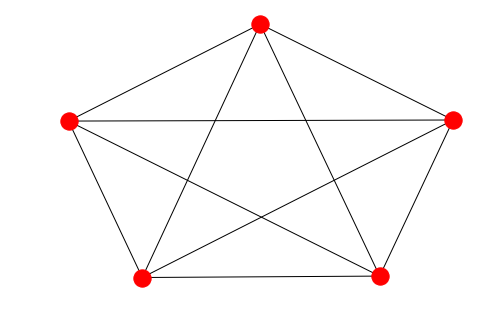

In [28]:
qc = get_qc("5q-qvm")

nx.draw(qc.qubit_topology())